### Import configuration and data.

In [1]:
%load_ext autoreload
%autoreload 2

from trainer import *

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Using {} device".format(device))

configfile = 'base_SNL_MSU_DOE_avg'

trainer = Trainer(device=device)
## Set params
trainer.load_config(default_configfile=configfile)
## Set datasets
trainer.load_data()

Using cpu device
{'project': 'SNL_MSU_DOE_avg', 'model': 'MLP', 'loss': 'mse', 'split_by': 'random', 'bayes_opt': False, 'patience': 500, 'epoch': 2000, 'lr': 0.003, 'weight_decay': 0.002, 'batch_size': 1024, 'static_params': {'patience': 500, 'epoch': 2000}, 'chosen_params': {'lr': 0.003, 'weight_decay': 0.002, 'batch_size': 1024}, 'layers': [16, 64, 128, 128, 64, 16], 'n_calls': 30, 'sequence': True, 'SPACEs': {'lr': {'low': 0.001, 'high': 0.05, 'prior': 'log-uniform'}, 'weight_decay': {'low': 1e-05, 'high': 0.05, 'prior': 'log-uniform'}, 'batch_size': {'categories': [32, 64, 128, 256, 512, 1024, 2048, 4096]}}, 'feature_names_type': {'Percentage of Fibre in 0-deg Direction': 1, 'Percentage of Fibre in 45-deg Direction': 1, 'Percentage of Fibre in 90-deg Direction': 1, 'Percentage of Fibre in Other Direction': 1, 'Absolute Maximum Stress': 0, 'Absolute Peak-to-peak Stress': 0, 'Frequency': 0, 'Fibre Volumn Fraction': 1, 'Relative Maximum Stress': 0, 'Relative Peak-to-peak Stress': 0, 

### Gaussian process-based Bayes hyperparameter optimization (Optional)

In [2]:
trainer.params = trainer.bayes()
print(trainer.params)

Bayes optimization not activated in configuration file. Return preset chosen_params.
{'lr': 0.003, 'weight_decay': 0.002, 'batch_size': 1024}


### Training

Epoch: 1/2000, Train loss: 31.2304, Val loss: 4.8462, Min val loss: 4.8462
Epoch: 100/2000, Train loss: 0.3097, Val loss: 0.6028, Min val loss: 0.5851
Epoch: 200/2000, Train loss: 0.2098, Val loss: 0.5371, Min val loss: 0.4956
Epoch: 300/2000, Train loss: 0.1258, Val loss: 0.4608, Min val loss: 0.4464
Epoch: 400/2000, Train loss: 0.1579, Val loss: 0.5334, Min val loss: 0.4403
Epoch: 500/2000, Train loss: 0.1418, Val loss: 0.5330, Min val loss: 0.4282
Epoch: 600/2000, Train loss: 0.0750, Val loss: 0.4553, Min val loss: 0.4186
Epoch: 700/2000, Train loss: 0.0938, Val loss: 0.4818, Min val loss: 0.4186
Epoch: 800/2000, Train loss: 0.0956, Val loss: 0.4641, Min val loss: 0.4186
Epoch: 900/2000, Train loss: 0.1333, Val loss: 0.4496, Min val loss: 0.4186
Epoch: 1000/2000, Train loss: 0.0674, Val loss: 0.4297, Min val loss: 0.4186
Early stopping at epoch 1089, Checkpoint at epoch 589, Train loss: 0.0966, Val loss: 0.4186
Minimum loss: 0.41860
Test MSE loss: 0.37651, RMSE loss: 0.61361


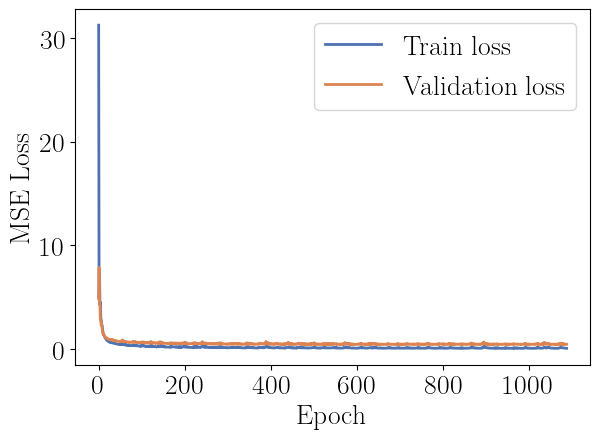

In [3]:
trainer.train()
trainer.plot_loss()

### Plotting predictions and comparing with baseline models.

Train Loss: 0.0866, R2: 0.9494
Validation Loss: 0.4186, R2: 0.7449
Test Loss: 0.3765, R2: 0.7290


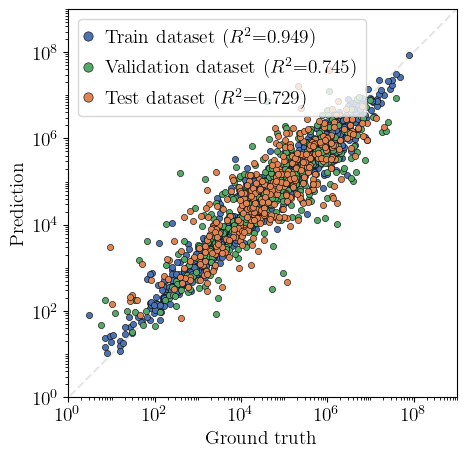

In [4]:
trainer.plot_truth_pred()

### Permutation feature importance

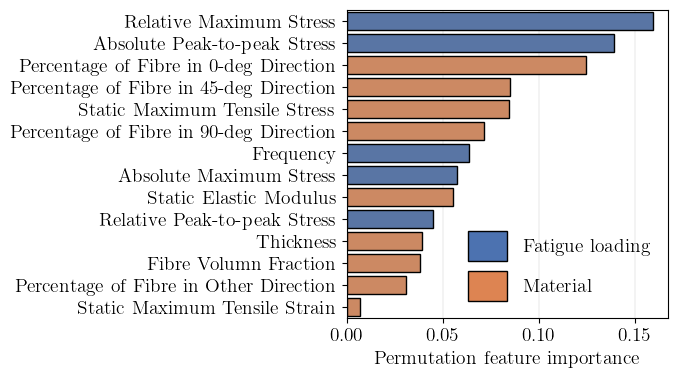

In [5]:
trainer.plot_feature_importance()

### Partial dependence

Calculate PDP:  Percentage of Fibre in 0-deg Direction
Calculate PDP:  Percentage of Fibre in 45-deg Direction
Calculate PDP:  Percentage of Fibre in 90-deg Direction
Calculate PDP:  Percentage of Fibre in Other Direction
Calculate PDP:  Absolute Maximum Stress
Calculate PDP:  Absolute Peak-to-peak Stress
Calculate PDP:  Frequency
Calculate PDP:  Fibre Volumn Fraction
Calculate PDP:  Relative Maximum Stress
Calculate PDP:  Relative Peak-to-peak Stress
Calculate PDP:  Thickness
Calculate PDP:  Static Maximum Tensile Stress
Calculate PDP:  Static Maximum Tensile Strain
Calculate PDP:  Static Elastic Modulus


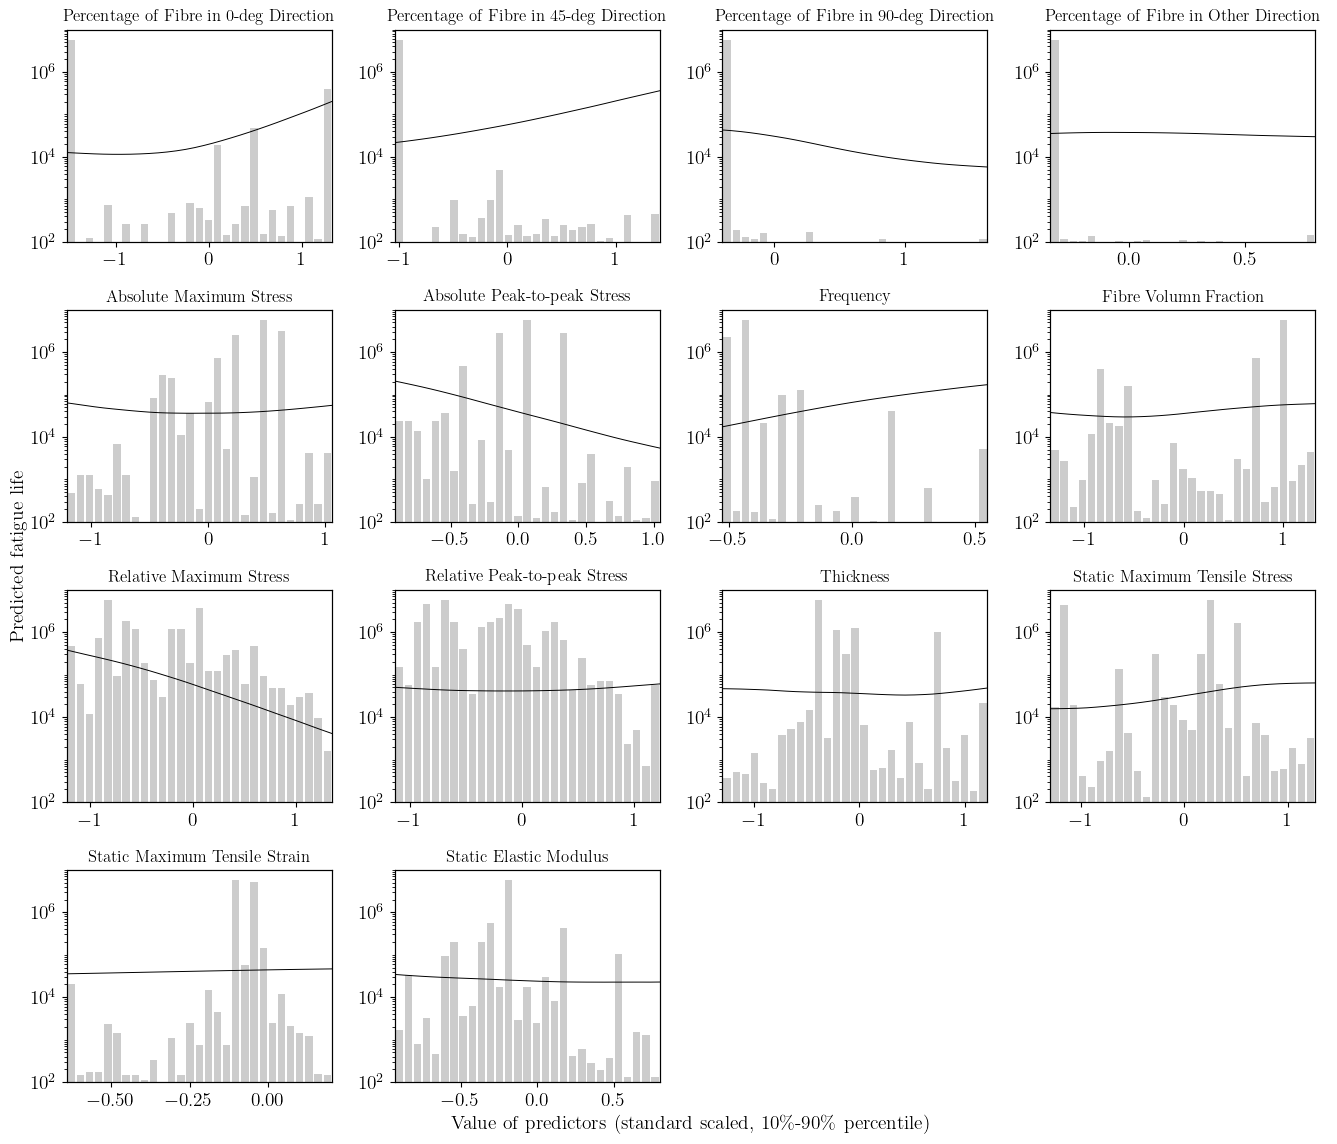

In [6]:
trainer.plot_partial_dependence()

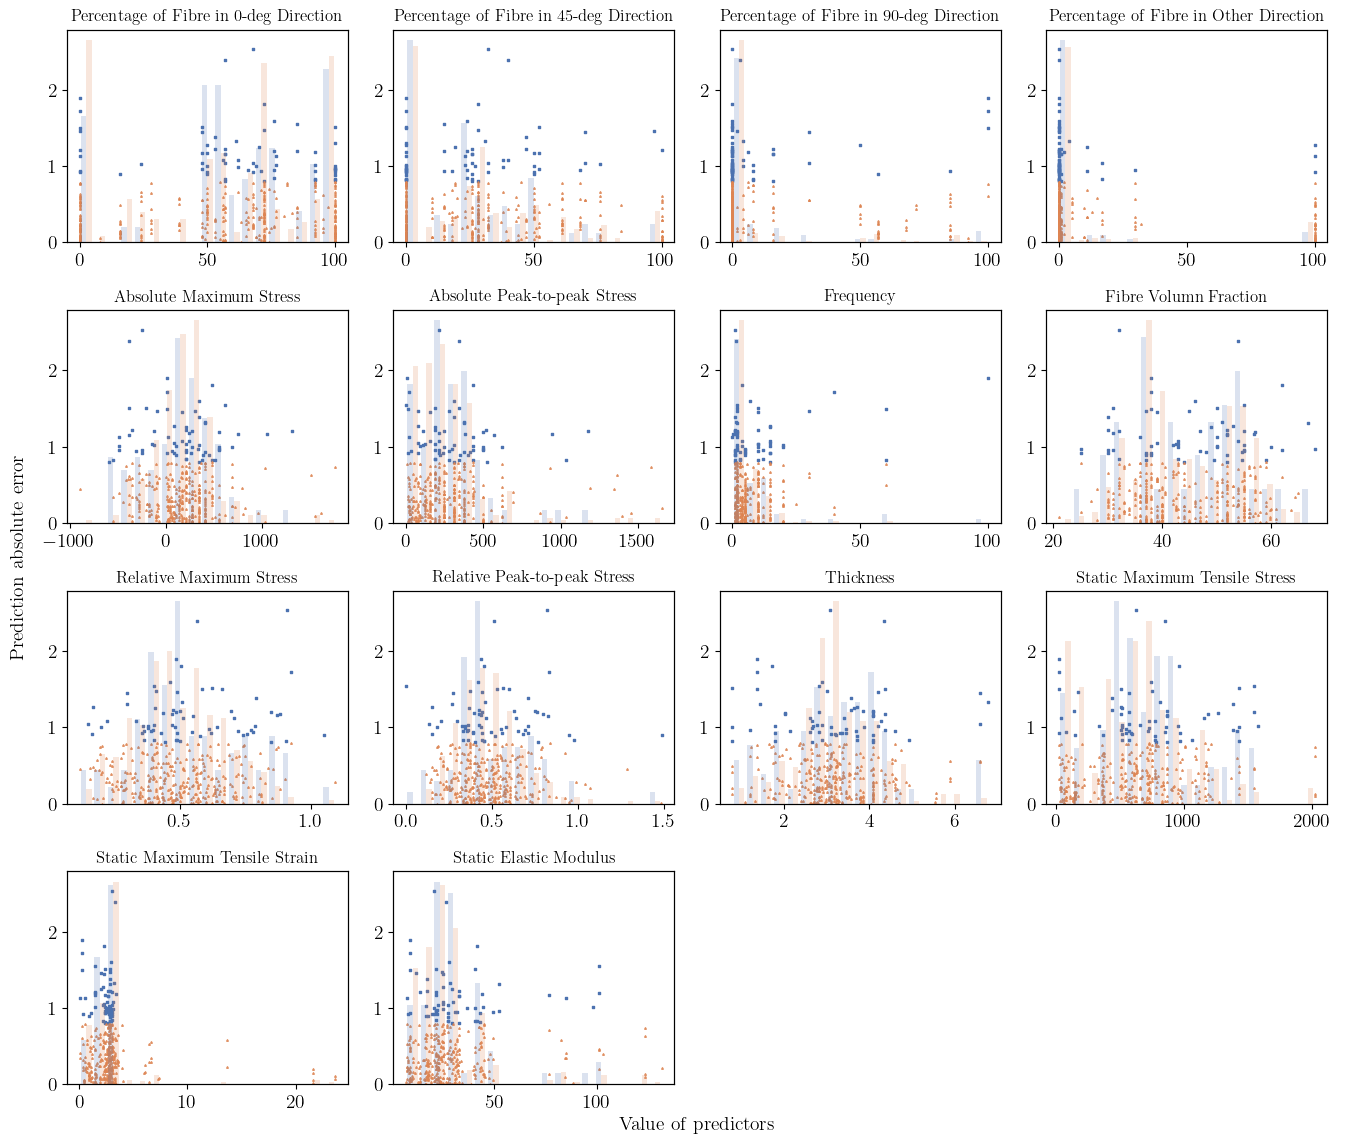

In [7]:
trainer.plot_partial_err()

## Baseline models

In [8]:
trainer.autogluon_tests(verbose=False)


-------------Run AutoGluon Tests-------------




-------------AutoGluon Tests End-------------



In [9]:
trainer.pytorch_tabular_tests(verbose=False)


-------------Run Pytorch-tabular Tests-------------

Training CategoryEmbeddingModel
Training TabNetModel
Training TabTransformerModel
Training AutoIntModel


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
trainer.get_leaderboard(test_data_only=True)

In [ ]:
trainer.plot_truth_pred(program='pytorch_tabular')

In [ ]:
trainer.plot_truth_pred(program='autogluon')